In [168]:
# loan approval prediction 
# using logistic regression, support vector machine , decision tree
# then compairing their accuracy and using the best model to predict the loan approval
# columns :- loan_id, no_of_dependents, education, self_employed, income_annum, loan_amount, loan_term, cibil_score, residential_assets_value, commercial_assets_value, luxury_assets_value, bank_asset_value, loan_status

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from colorama import Fore, Style 

data = pd.read_csv('test.csv')


# Check the balance of the dataset
data.columns = data.columns.str.strip()
print(data['loan_status'].value_counts())

loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64


<h3 style="color:yellow;"> data cleaning 

In [169]:
# checking null values
print(Fore.RED + Style.BRIGHT + "checking null values :- "); print(Style.RESET_ALL)
print(data.isnull().sum())

checking null values :- 

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64


In [170]:
data.drop('loan_id', axis=1, inplace=True)

#@ Fill missing numerical values with mean
numerical_cols = data.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    data[col] = data[col].fillna(data[col].mean())

#@ Fill missing categorical values with mode
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

# checking null values
print(data.isnull().sum())

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64


<h3 style="color:yellow;">Changing strings to numbers</h3>

In [171]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Define the categorical columns
categorical_cols = ['no_of_dependents', 'education', 'self_employed', 'loan_status']

# Remove leading and trailing spaces
for col in data.columns:
    if data[col].dtype == 'object':  # If column is of object type (likely strings)
        data[col] = data[col].str.strip()

# Initialize the LabelEncoder
le = LabelEncoder()

# Splitting the data into test and train sets
x_train, x_test, y_train, y_test = train_test_split(data.drop('loan_status', axis=1), data['loan_status'], test_size=0.2, random_state=42)

# # Initialize a dictionary to hold the label encoders
# label_encoders = {}

# Encode the categorical columns
for col in categorical_cols:
    if col != 'loan_status':  # Exclude the target variable
        le = LabelEncoder()
        le.fit(data[col])  # Fit the LabelEncoder using the entire data
        x_train[col] = le.transform(x_train[col])
        x_test[col] = le.transform(x_test[col])
        label_encoders[col] = le

# Encode the target variable separately
le = LabelEncoder()
le.fit(data['loan_status'])  # Fit the LabelEncoder using the entire data
y_train = le.transform(y_train)
y_test = le.transform(y_test)
label_encoders['loan_status'] = le

# Feature Scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [172]:
print("Encoding:", list(le.classes_))

# Print the unique values of y_train and y_test
print("Unique values in y_train:", np.unique(y_train))
print("Unique values in y_test:", np.unique(y_test))

Encoding: ['Approved', 'Rejected']
Unique values in y_train: [0 1]
Unique values in y_test: [0 1]


<h3 style="color:yellow;"> traning the  model

In [173]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 

#loading the models in different vars
logistic_model = LogisticRegression()
support_vector_model = SVC(probability=True)
decision_tree_model = DecisionTreeClassifier()

#!training the models
logistic_model.fit(x_train, y_train)
support_vector_model.fit(x_train, y_train)
decision_tree_model.fit(x_train, y_train)

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

<p style="color:pink;"> RoC curve </p>

AUC-ROC of Logistic Regression: 0.9674798178916737
AUC-ROC of Support Vector Machine: 0.9837369754998593
AUC-ROC of Decision Tree: 0.9730298976814044


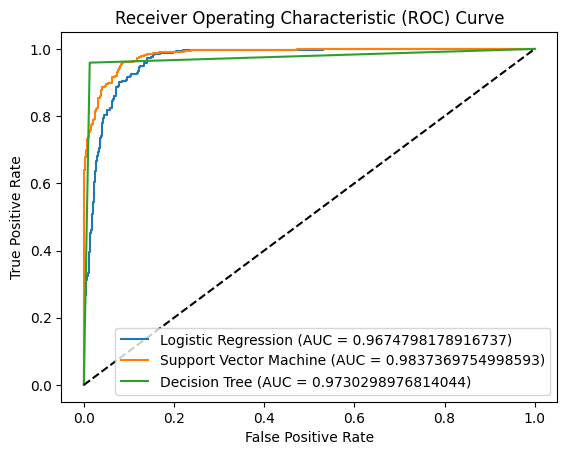

In [174]:
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate the probabilities of the positive class
y_prob_logistic = logistic_model.predict_proba(x_test)[:, 1]
y_prob_svc = support_vector_model.decision_function(x_test)
y_prob_decision_tree = decision_tree_model.predict_proba(x_test)[:, 1]

# Calculate the AUC-ROC
auc_roc_logistic = roc_auc_score(y_test, y_prob_logistic)
auc_roc_svc = roc_auc_score(y_test, y_prob_svc)
auc_roc_decision_tree = roc_auc_score(y_test, y_prob_decision_tree)

# Print the AUC-ROC scores
print(f"AUC-ROC of Logistic Regression: {auc_roc_logistic}")
print(f"AUC-ROC of Support Vector Machine: {auc_roc_svc}")
print(f"AUC-ROC of Decision Tree: {auc_roc_decision_tree}")

# Calculate the ROC curve points
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_prob_logistic)
fpr_svc, tpr_svc, _ = roc_curve(y_test, y_prob_svc)
fpr_decision_tree, tpr_decision_tree, _ = roc_curve(y_test, y_prob_decision_tree)

# Plot the ROC curve
plt.plot(fpr_logistic, tpr_logistic, label=f'Logistic Regression (AUC = {auc_roc_logistic})')
plt.plot(fpr_svc, tpr_svc, label=f'Support Vector Machine (AUC = {auc_roc_svc})')
plt.plot(fpr_decision_tree, tpr_decision_tree, label=f'Decision Tree (AUC = {auc_roc_decision_tree})')
plt.plot([0, 1], [0, 1], 'k--')  # Add a diagonal line, which represents a random classifier

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

comparing the accuracy of the models

In [175]:
a = auc_roc_logistic; b = auc_roc_svc; c = auc_roc_decision_tree
if (a > b and a > c):
    print(Fore.GREEN + Style.BRIGHT + "Logistic Regression has the highest accuracy")
    best_model = logistic_model
elif (b > a and b > c):
    print(Fore.GREEN + Style.BRIGHT + "Support Vector Machine has the highest accuracy")
    best_model = support_vector_model
else:
    print(Fore.GREEN + Style.BRIGHT + "Decision Tree has the highest accuracy")
    best_model = decision_tree_model

Support Vector Machine has the highest accuracy


<h3 style="color:yellow;"> taking input from the user </h3>

In [176]:
def predict_loan_status():
    # Take user input
    no_of_dependents = input("Enter number of dependents: ")
    education = input("Enter education level (Graduate/Not Graduate): ")
    self_employed = input("Enter self-employed status (Yes/No): ")
    income_annum = input("Enter annual income: ")
    loan_amount = input("Enter loan amount: ")
    loan_term = input("Enter loan term: ")
    cibil_score = input("Enter CIBIL score: ")
    residential_assets_value = input("Enter residential assets value: ")
    commercial_assets_value = input("Enter commercial assets value: ")
    luxury_assets_value = input("Enter luxury assets value: ")
    bank_asset_value = input("Enter bank asset value: ")

    # Convert the input into a DataFrame
    data = pd.DataFrame({
        'no_of_dependents': [no_of_dependents], 
        'education': [education], 
        'self_employed': [self_employed],
        'income_annum': [income_annum],
        'loan_amount': [loan_amount],
        'loan_term': [loan_term],
        'cibil_score': [cibil_score],
        'residential_assets_value': [residential_assets_value],
        'commercial_assets_value': [commercial_assets_value],
        'luxury_assets_value': [luxury_assets_value],
        'bank_asset_value': [bank_asset_value]
    })

    # Apply Label Encoding
    for col in categorical_cols:
        if col != 'loan_status':  # Exclude the target variable
            data[col] = label_encoders[col].transform(data[col])

    # Apply Feature Scaling
    data = scaler.transform(data)

    # Make a prediction
    prediction = best_model.predict(data)

    # Convert the prediction back to its original form ('Approved' or 'Rejected')
    prediction = label_encoders['loan_status'].inverse_transform(prediction)

    return prediction[0]

print("Loan status:", predict_loan_status())

Loan status: Approved
